In [60]:
#import libraries
#write your code.
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report




In [61]:
#load data

#write your code
#data_path=('/content/data 1 - data.csv')
#data=pd.read_csv(data_path)
data=np.loadtxt("data (1).txt",delimiter=',')
X=data[:,:2]
y=data[:,2]
X_train=X
y_train=y

X_train,X_val,y_train,y_val = train_test_split(X,y,random_state=0,test_size=0.2)

In [62]:
#plot data to visualise
def plot_data(X, y, positive_label="y=1", negative_label="y=0"):
#write your code
    pos = y == 1
    neg = y == 0
    plt.plot(X[pos, 0], X[pos, 1], 'rx', label=positive_label)
    plt.plot(X[neg, 0], X[neg, 1], 'go', label=negative_label)

    #plt.scatter(X[pos][:, 1], X[pos][:, 0], marker='x', c='r', label=positive_label)
    #plt.scatter(X[neg][:, 1], X[neg][:, 0], marker='o', c='b', label=negative_label)



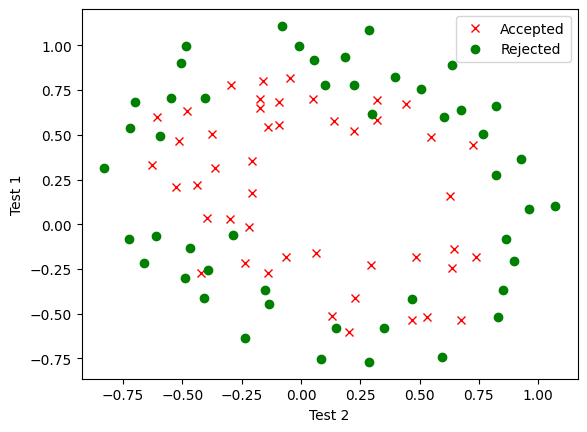

In [63]:
#test
plot_data(X_train, y_train[:], positive_label="Accepted", negative_label="Rejected")


plt.xlabel('Test 2')
plt.ylabel('Test 1')
plt.legend(loc="upper right")
plt.show()


In [64]:
#feature mapping
def map_feature(X1,X2):
#write your code
  X1=np.atleast_1d(X1)
  X2=np.atleast_1d(X2)
  degree=6
  out=[]
  for i in range(1,degree+1):
    for j in range(i+1):
      out.append((X1**(i-j) * (X2**j)))
  return np.stack(out,axis=1)

In [65]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

#training
#model = LogisticRegression()
#model.fit(mapped_X, y_train)

#validating
#mapped_X_val = map_feature(X_val[:, 0], X_val[:, 1])
#val_predictions = model.predict(mapped_X_val)

#accuracy = accuracy_score(y_val, val_predictions)
#print(f'Accuracy: {accuracy:.2f}')
#print('Confusion Matrix:')
#print(confusion_matrix(y_val, val_predictions))
#print('Classification Report:')
#print(classification_report(y_val, val_predictions))

Original shape of data: (94, 2)
Shape after feature mapping: (94, 27)


In [66]:
# @title DO NOT EDIT THIS CODE
def sigmoid_test(target):
    assert np.isclose(target(3.0), 0.9525741268224334), "Failed for scalar input"
    assert np.allclose(target(np.array([2.5, 0])), [0.92414182, 0.5]), "Failed for 1D array"
    assert np.allclose(target(np.array([[2.5, -2.5], [0, 1]])),
                       [[0.92414182, 0.07585818], [0.5, 0.73105858]]), "Failed for 2D array"
    print('\033[92mTests passed!')

In [67]:
#sigmoid function
def sigmoid(z):
#write your code
    return 1 / (1 + np.exp(-z))


In [68]:
sigmoid_test(sigmoid)

Tests passed!


In [69]:
# @title DO NOT EDIT THIS CODE
import math
def compute_cost_test(target):
    X = np.array([[0, 0, 0, 0]]).T
    y = np.array([0, 0, 0, 0])
    w = np.array([0])
    b = 1
    result = target(X, y, w, b)
    if math.isinf(result):
        raise ValueError("Did you get the sigmoid of z_wb?")

    np.random.seed(17)
    X = np.random.randn(5, 2)
    y = np.array([1, 0, 0, 1, 1])
    w = np.random.randn(2)
    b = 0
    result = target(X, y, w, b)
    assert np.isclose(result, 2.15510667), f"Wrong output. Expected: {2.15510667} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 1, 0, 0])
    w = np.random.randn(3)
    b = 0

    result = target(X, y, w, b)
    assert np.isclose(result, 0.80709376), f"Wrong output. Expected: {0.80709376} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 0,1, 0])
    w = np.random.randn(3)
    b = 3
    result = target(X, y, w, b)
    assert np.isclose(result, 0.4529660647), f"Wrong output. Expected: {0.4529660647} got: {result}. Did you inizialized z_wb = b?"

    print('\033[92mTests passed!')

In [70]:
#computing cost
def compute_cost(X,y,w,b,lambda_=1):
#write your code
    m = X.shape[0]
    total_cost = 0

    for i in range(m):
        z = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z)
        total_cost += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)



    total_cost = (total_cost / m)

    return total_cost

In [71]:
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))


# test
compute_cost_test(compute_cost)

Cost at test w,b: 11.723
Tests passed!


In [72]:
#compute regularised cost
def compute_cost_reg(X, y, w, b, lambda_ = 1):
  #write your code
    m = X.shape[0]
    total_cost = compute_cost(X, y, w, b)

    reg_cost = (lambda_ / (2 * m)) * np.sum(np.square(w))
    total_cost += reg_cost

    return total_cost

In [73]:
# @title DO NOT EDIT THIS CODE
def compute_cost_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(3)
    b = 0.4
    X = np.random.randn(6, 3)
    y = np.array([0, 1, 1, 0, 1, 1])
    lambda_ = 0.1
    expected_output = target(X, y, w, b, lambda_)

    assert np.isclose(expected_output, 0.5469746792761936), f"Wrong output. Expected: {0.5469746792761936} got:{expected_output}"

    w = np.random.randn(5)
    b = -0.6
    X = np.random.randn(8, 5)
    y = np.array([1, 0, 1, 0, 0, 1, 0, 1])
    lambda_ = 0.01
    output = target(X, y, w, b, lambda_)
    assert np.isclose(output, 1.2608591964119995), f"Wrong output. Expected: {1.2608591964119995} got:{output}"

    w = np.array([2, 2, 2, 2, 2])
    b = 0
    X = np.zeros((8, 5))
    y = np.array([0.5] * 8)
    lambda_ = 3
    output = target(X, y, w, b, lambda_)
    expected = -np.log(0.5) + 3. / (2. * 8.) * 20.
    assert np.isclose(output, expected), f"Wrong output. Expected: {expected} got:{output}"

    print('\033[92mAll tests passed!')

In [74]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularised cost :", cost)

#test
compute_cost_reg_test(compute_cost_reg)

Regularised cost : 0.6609996549505682
All tests passed!


In [75]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_test(target):
    np.random.seed(1)
    X = np.random.randn(7, 3)
    y = np.array([1, 0, 1, 0, 1, 1, 0])
    test_w = np.array([1, 0.5, -0.35])
    test_b = 1.7
    dj_db, dj_dw  = target(X, y, test_w, test_b)

    assert np.isclose(dj_db, 0.28936094), f"Wrong value for dj_db. Expected: {0.28936094} got: {dj_db}"
    assert dj_dw.shape == test_w.shape, f"Wrong shape for dj_dw. Expected: {test_w.shape} got: {dj_dw.shape}"
    assert np.allclose(dj_dw, [-0.11999166, 0.41498775, -0.71968405]), f"Wrong values for dj_dw. Got: {dj_dw}"

    print('\033[92mTests passed!')

In [76]:
#compute gradient
def compute_gradient(X, y, w, b, lambda_=None):
#write your code
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        z = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z)
        error = f_wb_i - y[i]
        dj_db += error
        for j in range(n):
            dj_dw[j] += error * X[i, j]

    dj_dw = dj_dw / m
    dj_db = dj_db / m


    return dj_db,dj_dw

In [77]:
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())

# test
compute_gradient_test(compute_gradient)

dj_db at test_w: -0.4893617020916176
dj_dw at test_w: [-0.012709382973788362, -0.09574437233818134]
Tests passed!


In [78]:
#compute regularised gradient
def compute_gradient_reg(X, y, w, b, lambda_=1):
#write your code
    m, n = X.shape
    dj_db, dj_dw = compute_gradient(X, y, w, b)

    dj_dw += (lambda_ / m) * w


    return dj_db,dj_dw

In [79]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(5)
    b = 0.2
    X = np.random.randn(7, 5)
    y = np.array([0, 1, 1, 0, 1, 1, 0])
    lambda_ = 0.1
    expected1 = (-0.1506447567869257, np.array([ 0.19530838, -0.00632206,  0.19687367,  0.15741161,  0.02791437]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)

    assert np.isclose(dj_db, expected1[0]), f"Wrong dj_db. Expected: {expected1[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected1[1]), f"Wrong dj_dw. Expected: {expected1[1]} got: {dj_dw}"


    w = np.random.randn(7)
    b = 0
    X = np.random.randn(7, 7)
    y = np.array([1, 0, 0, 0, 1, 1, 0])
    lambda_ = 0
    expected2 = (0.02660329857573818, np.array([ 0.23567643, -0.06921029, -0.19705212, -0.0002884 ,  0.06490588,
        0.26948175,  0.10777992]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)
    assert np.isclose(dj_db, expected2[0]), f"Wrong dj_db. Expected: {expected2[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected2[1]), f"Wrong dj_dw. Expected: {expected2[1]} got: {dj_dw}"

    print('\033[92mTests passed!')

In [80]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5

lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}" )
#test
compute_gradient_reg_test(compute_gradient_reg)

dj_db: 0.07129263820614946
Tests passed!


In [81]:

def gradient_descent(X, y, w, b, cost_function, gradient_function, alpha, num_iterations, lambda_):
    J_history = []
    w=initial_w
    b=initial_b


    for i in range(num_iterations):
        #dj_db, dj_dw = gradient_function(X, y, w, b, lambda_)
        dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, w, b, lambda_)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i % 100 == 0:
            cost = compute_cost_reg(X_mapped, y_train, w, b, lambda_)
            J_history.append(cost)
            print(f"Iteration {i:4}: Cost {cost:8.4f}")

    return w, b, J_history, _

np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.
lambda_ = 0.01;
num_iterations = 20000
alpha = 0.01


w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, num_iterations, lambda_)


Iteration    0: Cost   0.7189
Iteration  100: Cost   0.6675
Iteration  200: Cost   0.6394
Iteration  300: Cost   0.6233
Iteration  400: Cost   0.6133
Iteration  500: Cost   0.6064
Iteration  600: Cost   0.6011
Iteration  700: Cost   0.5968
Iteration  800: Cost   0.5929
Iteration  900: Cost   0.5893
Iteration 1000: Cost   0.5860
Iteration 1100: Cost   0.5828
Iteration 1200: Cost   0.5797
Iteration 1300: Cost   0.5766
Iteration 1400: Cost   0.5737
Iteration 1500: Cost   0.5708
Iteration 1600: Cost   0.5680
Iteration 1700: Cost   0.5652
Iteration 1800: Cost   0.5625
Iteration 1900: Cost   0.5599
Iteration 2000: Cost   0.5573
Iteration 2100: Cost   0.5548
Iteration 2200: Cost   0.5523
Iteration 2300: Cost   0.5498
Iteration 2400: Cost   0.5475
Iteration 2500: Cost   0.5451
Iteration 2600: Cost   0.5428
Iteration 2700: Cost   0.5406
Iteration 2800: Cost   0.5384
Iteration 2900: Cost   0.5362
Iteration 3000: Cost   0.5341
Iteration 3100: Cost   0.5320
Iteration 3200: Cost   0.5300
Iteration 

In [82]:
#plot decision boundary
def plot_decision_boundary(w,b,X,y):
#write your code
   plot_data(X[:, 0:2], y)

   if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)

        plt.plot(plot_x, plot_y, c="b")

   else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((len(u), len(v)))


        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)


        z = z.T


        plt.contour(u,v,z, levels = [0.5],colors="g")





C:\Users\Saurabh\AppData\Local\Temp\ipykernel_29452\303783473.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)


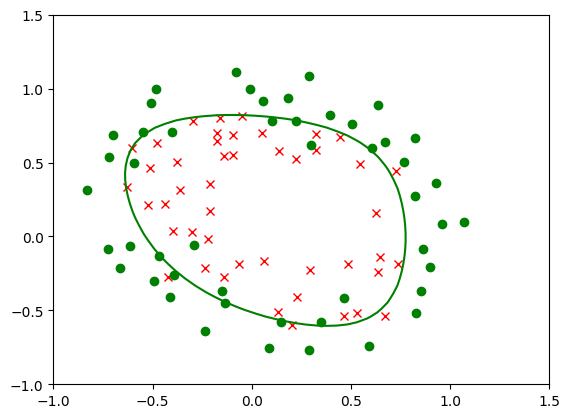

In [83]:
plot_decision_boundary(w, b, X_mapped, y_train)

In [84]:
#predict your training model
def predict(X, w, b):
    m,n=X.shape
    p=np.zeros(m)
  #write your code
    for i in range(m):
        z = np.dot(X[i], w) + b
        p[i] = sigmoid(z) >= 0.5




    return p

In [85]:
p = predict(X_mapped, w, b)

print('Accuracy of training model: %f'%(np.mean(p == y_train) * 100))

Accuracy of training model: 86.170213
